## Cargar los datos

In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/UNIR')

Mounted at /content/drive


In [91]:
df = pd.read_csv('dataset.csv')

## Análisis exploratorio de datos (EDA)

In [92]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


### Limpieza de valores faltantes

In [93]:
missing_values_count = df.isna().sum()
print(missing_values_count)
print('Total number of rows: ', len(df))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
Total number of rows:  418


Hay valores faltantes en las columnas: Age, Fare, Cabin.
Para la columna Cabin, hay 327 valores faltantes de un total de 418, lo que da un alto porcentaje y es mejor quitar esa columna de nuestro dataframe.

In [94]:
df.drop(['Cabin'], inplace=True, axis=1)

In [95]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


El valor faltante de Fare, lo vamos a sustituir con la media:

In [96]:
df['Fare']=df['Fare'].fillna(df['Fare'].mean())
print(df.isna().sum())

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64


Vamos a ver la distribución de los valores de la variable edad para saber como sustituír los valores faltantes:

(array([16., 16., 71., 97., 43., 37., 25., 17.,  9.,  1.]),
 array([ 0.17 ,  7.753, 15.336, 22.919, 30.502, 38.085, 45.668, 53.251,
        60.834, 68.417, 76.   ]),
 <BarContainer object of 10 artists>)

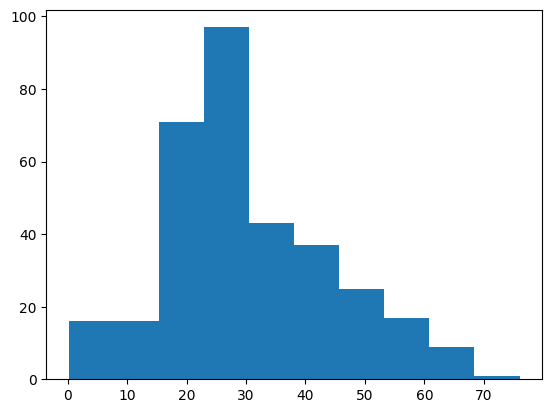

In [97]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(df['Age'])

In [98]:
print('Media de la edad: ', np.mean(df['Age']))
print('Mediana de la edad: ', np.nanmedian(df['Age']))

Media de la edad:  30.272590361445783
Mediana de la edad:  27.0


Los valores devueltos por la media y la mediana son muy similares. Vamos a rellenar los faltantes usando la imputación con el valor de la mediana para que los outliers no afecten:

In [99]:
df['Age']=df['Age'].fillna(np.nanmedian(df['Age']))
print(df.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### Transformamos las variables categóricas a numéricas:

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


Convertimos el género a numérica usando dummy encoding, de forma que tenemos 0 cuando el pasajero es mujer y 1 para hombres:

In [101]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [102]:
sex = pd.get_dummies(df['Sex'], dtype=int)
df['Sex'] = sex['female']
df['Sex'].head()

,Sex
0,0
1,1
2,0
3,0
4,1


Usamos también dummy encoding para la columna Embarked:

In [103]:
df['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [104]:
embarked_dummies = pd.get_dummies(df['Embarked'], dtype=int).rename(columns=lambda x: 'Embarked_' + str(x))
df = pd.concat([df, embarked_dummies], axis=1)
df.drop(['Embarked', 'Embarked_C'], inplace=True, axis=1)

In [105]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,1,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,1,0
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0,1


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    int64  
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked_Q   418 non-null    int64  
 11  Embarked_S   418 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 39.3+ KB


Para la columna ticket, contiene 363 valores distintos, por lo que una codificación de tipo dummy no es recomendable ya que tendríamos demasiadas nuevas columnas que serían difícil de interpretar. Vamos a elegir el ordinal encoding, arriesgándonos a que de un valor numérico a los tickets:

In [107]:
len(df['Ticket'].unique())

363

In [108]:
df['Ticket'].value_counts()

,count
Ticket,
PC 17608,5
CA. 2343,4
113503,4
PC 17483,3
220845,3
...,...
349226,1
2621,1
4133,1


In [109]:
df['Ticket'] = pd.factorize(df['Ticket'])[0]

In [110]:
df['Ticket'].value_counts()

,count
Ticket,
24,5
175,4
71,4
77,3
214,3
...,...
128,1
127,1
126,1


Para el nombre del pasajero, es una columna con valores únicos y solo nos interesa tenerla como una forma de identificar al pasajero, así que sustituírla por un identificador numérico es una buena opción. Sin embargo, ya tenemos una columna que cumple esa función, PassengerId, así que podemos quitar la columna de nombre:

In [111]:
df.drop(['Name'], inplace=True, axis=1)

Finalmente, este es el resultado de la base de datos limpia

In [112]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,892,0,3,0,34.5,0,0,0,7.8292,1,0
1,893,1,3,1,47.0,1,0,1,7.0000,0,1
2,894,0,2,0,62.0,0,0,2,9.6875,1,0
3,895,0,3,0,27.0,0,0,3,8.6625,0,1
4,896,1,3,1,22.0,1,1,4,12.2875,0,1


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    int64  
 8   Fare         418 non-null    float64
 9   Embarked_Q   418 non-null    int64  
 10  Embarked_S   418 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 36.0 KB


In [114]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked_Q,0


Guardamos en un csv con la información limpia:

In [90]:
df.to_csv('dataset_cleaned.csv')